# CSCI 3352 Biological Networks, Spring 2020, Prof. Clauset
Submit here: https://moodle.cs.colorado.edu/course/view.php?id=1273

# Problem Set 2 : Network representations and statistics

***

**Name**: Julia Sanford

**Worked with**: Denver Chernin

***

This assignment is due on Moodle by **11:55pm on Thursday, January 30th**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 100 points total, and 17 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Moodle.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Counting motifs (55 pts total)

Motifs are small subgraphs, often of 3 or 4 nodes, and their relative abundance can provide evidence for or against different underlying network assembly processes. Analyzing this kind of information depends on being able to count the number of occurrences of target motifs in a given network. In this problem, we'll develop such a counting algorithm.

***
### Problem 1-A (30 pts)

In directed networks, the two most commonly studied motifs are
* feed-forward loop ("FFL")
* cycle (sometimes called a feedback loop, or "FBL")

For instance, below is a simple directed graph (a "digraph") that contains one of each: the FFL is among nodes $\{1,2,3\}$ and the FBL is among nodes $\{4,5,6\}$.

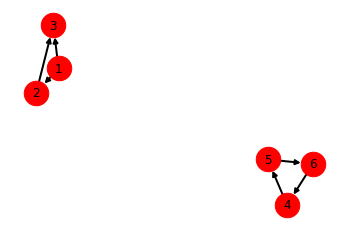

In [2]:
G = nx.DiGraph([(1,2), (2,3), (1,3), (4,5), (5,6), (6,4)])                            # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

* Write a function `count_FFBL_motifs()` that takes as input a directed graph `G` and a binary value `flag` and
  1. if `flag==1`, prints a statement of the form `FFL: (i,j),(j,k),(i,k)` or `FBL: (i,j),(j,k),(k,i)` for each FFL or unique FBL it finds, and
  * returns the counts the number of FFL motifs and the number of FBL motifs that `G` contains. <br/>
  
* Apply your function to the network `G` defined below, with `flag=1`, and report the FFL and FBL motif counts.
* Briefly explain how your algorithm for `count_FFBL_motifs()` works. (Note that the network is small enough that you can calculate the result by hand and use that information to debug your algorithm.)

Hint: Use a graph traversal approach to enumerate all paths of length two, e.g. $\sigma_{ijk} = \{(i\rightarrow j), (j \rightarrow k)\}$, where $i\not=k$, and for each, query the network for the existence of the third edge of the motif, either $(i,k)$ or $(k,i)$ depending on which motif is being counted. Within the DiGraph structure of `networkx`, the `neighbors` and `has_edge` functions will be useful.

*Warning*: remember that a single unique FBL motif can be counted 3 times, once for a 3-cycle starting at each of $i$, $j$, and $k$.

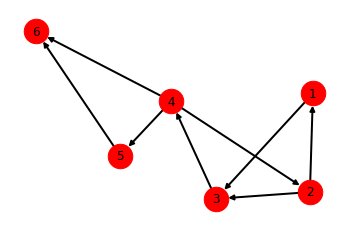

In [6]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

In [13]:
def count_FFBL_motifs(G,flag):
    # input : a networkx digraph G and a binary-valued variabe flag
    # output: if flag=1, a print statement of the type {FFL,FBL} and its member edges for each found motif
    #         a list (FFL,FBL) of the counts of feed-forward and feed-back loops in G
    
    # YOUR CODE HERE
    # create a count and empty lists of FFLs and FBLs
    FFL_count = 0
    FBL_count = 0
    FFL_list = []
    FBL_list = []
    
    for i in G.nodes():                                       # go through all nodes
        for j in G.neighbors(i):                              # go through each of i's neighbors
            for k in G.neighbors(j):                          # go through each of j's neighbors
                if (k != i):                                  # make sure it is not a back edge going from i -> j -> i
                    if (G.has_edge(i,k)):                     # check if there is an edge from i to k for FFL
                        FFL_count += 1                        # update the count and the list of FFLs
                        FFL_list.append((i,j,k))
                    if (G.has_edge(k,i)):                     # check if there is an edge from k to i for FBL
                        if (sorted([i,j,k]) not in FBL_list): # sort the i,j,k to see if it does not already exist
                            FBL_count += 1                    # update the count and the list of FBLs (sorted to check for repeats later)
                            FBL_list.append(sorted([i,j,k]))
    
    # if the flag is set, print the list of FFLs and FBLs in i,j,k pairs format
    if (flag):
        for ffl in FFL_list:
            i = str(ffl[0])
            j = str(ffl[1])
            k = str(ffl[2])
            print("FFL: (" + i + "," + j + "),(" + j + "," + k + "),(" + i + "," + k + ")")
        for fbl in FBL_list:
            i = str(fbl[0])
            j = str(fbl[1])
            k = str(fbl[2])
            print("FBL: (" + i + "," + j + "),(" + j + "," + k + "),(" + k + "," + i + ")")
            
    # return the number of FFLs and FBLs found
    return (FFL_count,FBL_count)

In [14]:
##### do not modify below here #####
counts = count_FFBL_motifs(G,1)

print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FFL: (2,1),(1,3),(2,3)
FFL: (4,5),(5,6),(4,6)
FBL: (2,3),(3,4),(4,2)
FFL count = 2
FBL count = 1


My algorithm goes through each node in the graph. It then goes through each node's neighbors to find all paths of length two. Then, it goes through all of the second node's neighbors. This set of neighbors is important because I want to see if there is any edge between the first node and this third node. If there is an edge going from the first to the third, then it will be a feed forward loop because 1 -> 2, 2 -> 3, and 1 -> 3. If there is an edge going from the third to the first, then we have a cycle which is a feedback loop because 1 -> 2, 2 -> 3, and 3 -> 1. Since, the feedback loops will appear 3 times starting from each of the 3 nodes, I sort the 3 nodes by id number and add it to the list. When I add a new FBL, I check if those 3 nodes sorted are in the list of FBLs so as to not repeat the same feedback loop.

### Problem 1-B (15 pts)
Before applying your motif counting function from `Problem 1-A` to some real data, follow the standard 'good practice' when importing a new network data set by computing and examining its summary statistics, which provides context for interpreting the output from counting motifs.

For the `metabolism_afulgidus` directed network, compute and report
* the number of nodes $n$ and directed edges $m$
* the mean in-degree $\langle k_{\rm in} \rangle$ and mean out-degree $\langle k_{\rm out} \rangle$
* a CCDF plot showing the in- and out-degree distribution $\Pr(K \geq k_{\rm in})$ and $\Pr(K \geq k_{\rm out})$ together (use the provided `plot_2CCDF()` function).
* the smallest number of nodes that together account for just over 50% of the out-degree 'wealth' in the network

Comment briefly on
* the applicability of the formula $\langle k \rangle = 2m/n$
* why the values for $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ turn out the way they do, and on their relationship to $2m/n$.
* what, if anything, does the shape of the in- and out-degree CCDFs indicate about the degree distributions of this network, and what that implies about metabolism.

(*2 pts extra credit*) Include a ridiculogram visualization of the network.

In [15]:
def plot_2CCDF(kins,kouts):
    # input : two lists of in- and out-degrees
    # output: a plot showing CCDFs of the in- and out-degree distributions Pr(K>=k) for k>=1
    
    kin_max  = max(kins)
    kout_max = max(kouts)

    # histograms
    icounts, ibins = np.histogram(kins, bins=[i for i in range(kin_max+2)], density=True)
    icumcounts = np.cumsum(icounts)
    icumcounts = np.insert(icumcounts,0,0)
    ocounts, obins = np.histogram(kouts, bins=[i for i in range(kout_max+2)], density=True)
    ocumcounts = np.cumsum(ocounts)
    ocumcounts = np.insert(ocumcounts,0,0)

    # plots
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.loglog(obins[1:-1], 1-ocumcounts[1:-1], 'bo', alpha=0.5, label='out-degree')
    plt.loglog(ibins[1:-1], 1-icumcounts[1:-1], 'rs', alpha=0.5, label='in-degree')
    plt.title('CCDF, in- and out-degrees (loglog)')
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.legend(loc='upper right');
    plt.show()
    return

reading the network file : metabolism_afulgidus.gml

number of nodes, n  = 315
number of edges, m  = 5434

mean(k_in)  = 17.25
mean(k_out) = 17.25

smallest num for 50%  = 31 of 315 nodes


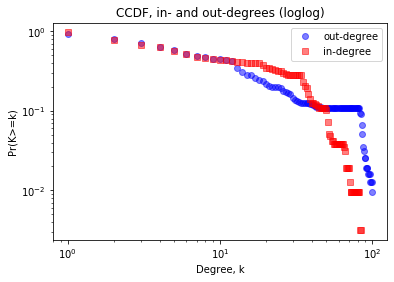

In [16]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####

# Your code here
# read in the file with ids as labels
g = nx.read_gml(fname, label='id') # read from file

# get nodes, edges
n = g.number_of_nodes()
m = g.number_of_edges()

# 
kins = [j for i,j in g.in_degree()]
kouts = [j for i,j in g.out_degree()]
kin_mean = sum(kins) / n
kout_mean = sum(kouts) / n

# 
kout_50 = sum(kouts) / 2
kouts_sort = sorted(kouts)
ind = 0
count = 0
for i in range(len(kouts_sort)-1,0,-1):
    if (count < kout_50):
        count += kouts_sort[i]
        ind += 1

##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'\nmean(k_in)  = %5.2f' % kin_mean)
print(f'mean(k_out) = %5.2f' % kout_mean)
print(f'\nsmallest num for 50%  = {ind} of {n} nodes')
plot_2CCDF(kins,kouts)

* The formula $\langle k \rangle = 2m/n$ give you the average number of connections for each node in a graph because per node you take its edges and multiply it by two since each edge is counted for two nodes in an undirected graph.
* $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ are equal in this graph and are each half of what $2m/n$ is. This is because $2m/n$ represents both the in and out degrees of a node, so if $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ are both half of the total degree of a node, then on average, each node has half in degrees and half out degrees.
* The in- and out-degree CCDFs shapes indicates that the probability of having some x out-degrees is very similar to the probability of having the same x in-degrees because both follow a similar curve. This implies that for metabolism, each node gets in some amount of information (in-degree) and puts out a similar amount of information (out-degree) to regulate metabolism.

### Problem 1-C (10 pts)
* Apply your motif counting function `count_FFBL_motifs()` from `Problem 1-A` to the `metabolism_afulgidus` directed network, with `flag=0`, to count its FFL and FBL motifs.
* Report the number of each that you find, and comment briefly on (1) their relative abundance, and (2) what you think this might mean for how 'information' might flow across this network.

In [17]:
# Your code here
counts = count_FFBL_motifs(g,0)

##### do not modify below here #####
print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FFL count = 133378
FBL count = 24171


There are about four times more feed forward loops than there are feeback loops. This could be because with metabolism, it is most often sending information forward. There are still some occasions where it sends feedback to regulate itself.

***
***
## Problem 2 : Graph representations (12 pts total)

Consider the following networks.

Network 1:
![alt text](http://santafe.edu/~aaronc/courses/3352/network_represent_1.png "Network 1")

Network 2:
![alt text](http://santafe.edu/~aaronc/courses/3352/network_represent_2.png "Network 2")

***
### Problem 2-A (3 pts)

For Network 1, give the adjacency matrix representation. Let $(i\to j) \implies A_{ij}=1$.

\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5 \\
1 & 0 & 1 & 0 & 0 & 1 \\
2 & 0 & 0 & 1 & 0 & 0 \\
3 & 1 & 0 & 0 & 0 & 0 \\
4 & 1 & 0 & 0 & 0 & 1 \\
5 & 0 & 0 & 1 & 1 & 0 \\
\end{bmatrix}

***
### Problem 2-B (3 pts)

For Network 1, give the adjacency list representation.

$1: (2,5)$ <br>
$2: (3)$ <br>
$3: (1)$ <br>
$4: (1,5)$ <br>
$5: (3,4)$ <br>

***
### Problem 2-B (6 pts)

For Network 2, give the adjacency matrix representation of both one-mode projections.

Grey nodes:
\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5 \\
1 & 0 & 0 & 1 & 1 & 1 \\
2 & 0 & 0 & 0 & 1 & 1 \\
3 & 1 & 0 & 0 & 0 & 0 \\
4 & 1 & 1 & 0 & 0 & 0 \\
5 & 1 & 1 & 0 & 0 & 0 \\
\end{bmatrix}
<br>
White nodes:
\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5 & 6 \\
1 & 0 & 1 & 1 & 0 & 1 & 0 \\
2 & 1 & 0 & 1 & 0 & 0 & 1 \\
3 & 1 & 1 & 0 & 1 & 1 & 0 \\
4 & 0 & 0 & 1 & 0 & 0 & 0 \\
5 & 1 & 0 & 1 & 0 & 0 & 0 \\
6 & 0 & 1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}

***
***

## Problem 3 : Calculations by hand (13 pts total)

For each of the following networks, calculate the requested information by hand.

Do not use software to do these calculations. Write up your answer in Markdown in the corresponding box below.

***
### Problem 3-A (6 pts)

* Enumerate and count the number of 2-cycle motifs <br/> write each in the form $(a\to b\to a)$
* Enumerate and count the number of FFL and unique FBL motifs <br/> for each FFL, note which node is "feeding forward" a signal
* Enumerate and count the number of _walks_ of length 3 <br/> write each in the form $(a\to b\to c \to d)$

Hint: A _walk_ and a _path_ are slightly different. In the former, nodes can be repeated, while in the latter, they cannot.

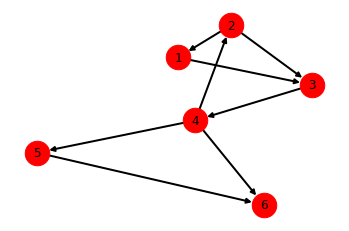

In [18]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])                     # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

* 2-cycle motifs: 0 <br>
<br>
* FFL: 2 <br>
(2 $\rightarrow$ **1** $\rightarrow$ 3) <br>
(4 $\rightarrow$ **5** $\rightarrow$ 6) <br>
<br>
* FBL: 1 <br>
(2 $\rightarrow$ 3 $\rightarrow$ 4) <br>
<br>
* Walks: 12 <br>
(1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 2) <br>
(1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5) <br>
(1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 6) <br>
(2 $\rightarrow$ 1 $\rightarrow$ 3 $\rightarrow$ 4) <br>
(2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 2) <br>
(2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5) <br>
(2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 6) <br>
(3 $\rightarrow$ 4 $\rightarrow$ 2 $\rightarrow$ 1) <br>
(3 $\rightarrow$ 4 $\rightarrow$ 2 $\rightarrow$ 3) <br>
(3 $\rightarrow$ 4 $\rightarrow$ 5 $\rightarrow$ 6) <br>
(4 $\rightarrow$ 2 $\rightarrow$ 1 $\rightarrow$ 3) <br>
(4 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 4) <br>

***
### Problem 3-B (7 pts)

Let $G$ be the [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph), with $n=10$ nodes and $m=15$ edges. For $\ell\in\{2,3,4,5\}$, count the number of $\ell$-cycles in $G$. For convenience, label the outer nodes $(1,2,3,4,5)$ starting at 12 o'clock and running clockwise, and label the inner nodes $(6,7,8,9,10)$ in the same fashion.

Hint: a *cycle* is a path (no edges repeated) that begins and ends at the same node.

* 2-cycles: 0 <br>
<br>
* 3-cycles: 0 <br>
<br>
* 4-cycles: 0 <br>
<br>
* 5-cycles: 12 <br>
(1 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5 $\rightarrow$ 1) <br>
(1 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ 10 $\rightarrow$ 5 $\rightarrow$ 1) <br>
(1 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 6 $\rightarrow$ 1) <br>
(1 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 8 $\rightarrow$ 6 $\rightarrow$ 1) <br>
(1 $\rightarrow$ 5 $\rightarrow$ 10 $\rightarrow$ 8 $\rightarrow$ 6 $\rightarrow$ 1) <br>
(1 $\rightarrow$ 5 $\rightarrow$ 4 $\rightarrow$ 9 $\rightarrow$ 6 $\rightarrow$ 1) <br>
(2 $\rightarrow$ 3 $\rightarrow$ 8 $\rightarrow$ 10 $\rightarrow$ 7 $\rightarrow$ 2) <br>
(2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 9 $\rightarrow$ 7 $\rightarrow$ 2) <br>
(3 $\rightarrow$ 8 $\rightarrow$ 6 $\rightarrow$ 9 $\rightarrow$ 4 $\rightarrow$ 3) <br>
(3 $\rightarrow$ 8 $\rightarrow$ 10 $\rightarrow$ 5 $\rightarrow$ 4 $\rightarrow$ 3) <br>
(4 $\rightarrow$ 5 $\rightarrow$ 10 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 4) <br>
(6 $\rightarrow$ 8 $\rightarrow$ 10 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 6) <br>

***
### Problem 3-C (*5 pts extra credit*)

Let $G$ be a network with $n$ nodes and $m=3n$ directed edges. For each of the following representations, first derive as a function of $n$ the number of *bits* required to store $G$; then, let $n=100,000$ and give the number of gigabytes necessary to store $G$. Comment on whether this is feasible. You may ignore the cost of storing any pointers.
* an adjacency matrix
* an adjacency list

Hint: It takes $\log_2 k$ bits to uniquely represent an integer of value $k$.

Your answer here

***
***

## Problem 4 : Node degree and local structure (20 pts)

The degree structure of a network is the "first-order" description of its organization, and is usually the first thing we analyze when examining any real-world network. That is, we ask the question: *how much of a network's structure is potentially driven by variation in node degrees?*

Typically, node degree correlates with many other node-level statistics, in part because higher degree nodes just have more edges attached to them, which allows them to attached to a wider variety of other nodes and structures.

In this question, you will investigate this correlation between node-level summary statistics in an open-ended fashion, focusing on how the in- and out-degrees correlate with each other and with other node-level measures. Remember that in a directed network, there are two kinds of degrees: the in-degree $k_{\rm in}$ and the out-degree $k_{\rm out}$.

* Using `networkx` functions as needed, compute the following node-level summary statistics for each node $v$ on the network from `Problem 1-B`:
  * the number of other nodes *reachable* from a node $v$ (e.g., using `single_source_shortest_path_length()`)
  * the *eccentricity* of a node $v$, defined as the maximum length geodesic from $v$
  * the *reciprocity* of a node $v$, defined as the fraction of out-edges $(v,u)$ that are reciprocated $(u,v)$
* Begin by making a scatter plot showing how in-degree $k_{i}^{\rm in}$ varies as a function of out-degree $k_{i}^{\rm out}$.
* Then make a series of additional scatter plots showing each of the three other node-level statistics covaries with in-degree and out-degree. Don't forget to label your axes (see syllabus...).
* Conclude with a brief discussion of what correlations you do and don't see, what patterns you see and what qualitative structures would give rise to them, and offer a brief explanation of your findings.

Hint 1: To explain why you think it appears, think carefully about the role that having more or fewer edges attached to some node $v$ has on the number and length of geodesic paths that originate at it.

Hint 2: For ease of comparison, plot both the in-degree and out-degree scatter on the same axes (but use different colors so you can tell them apart).

reading the network file : metabolism_afulgidus.gml



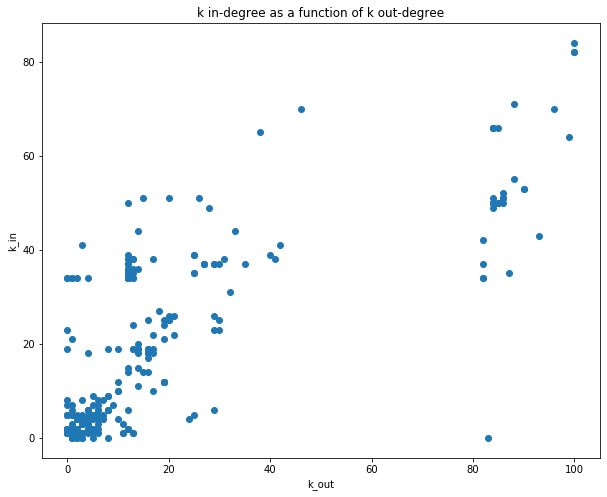

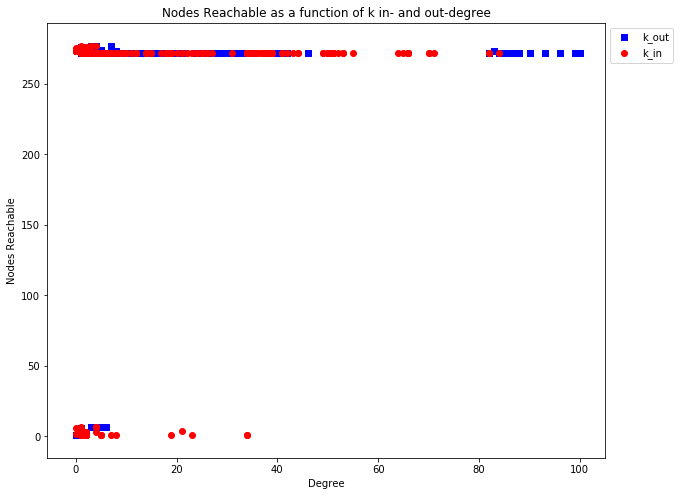

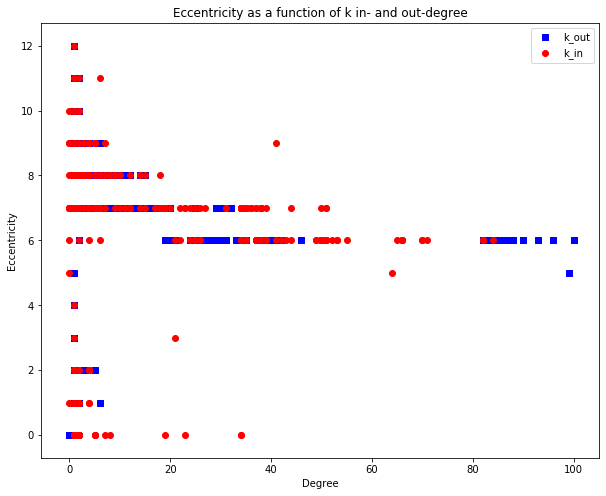

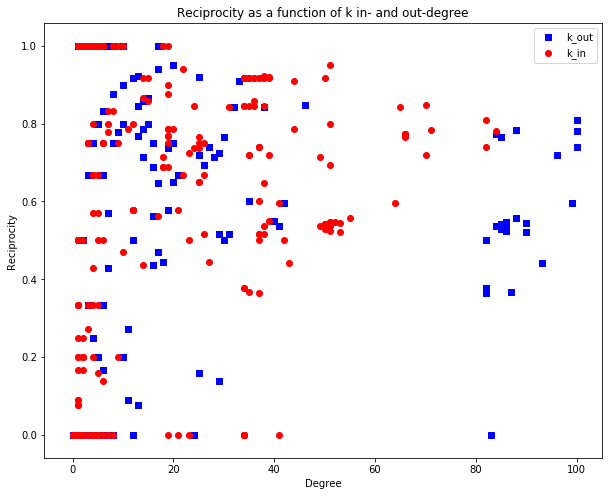

In [20]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####


# Your code here
g = nx.read_gml(fname, label='id') # read from file

# take all nodes and their list of shortest paths to other nodes and take the number of shortest
#    paths they have which is how many nodes they can reach
reachable = [len(nx.single_source_shortest_path_length(g,i)) for i in g.nodes()]

# create a list of all nodes' list of shortest paths to all nodes it can reach
all_nodes = [nx.single_source_shortest_path_length(g,i) for i in g.nodes()]
# for each list of reachable nodes, take the max length
eccentricity = [max(i.values()) for i in all_nodes]

reciprocity = []
for i in g.nodes():                   # go through all nodes
    if (g.out_degree(i) == 0):        # if it doesn't have any out-degree
        reciprocity.append(0)         #    then it has no reciprocity
    else:                             # if it has an out-degree check the reciprocity
        rec_nodes = 0                
        for j in g.neighbors(i):      # go through all its neighbors (out-degree)
            if (g.has_edge(j,i)):     # if there is an edge the other way
                rec_nodes += 1        #    then add a reciprocal node count
        reciprocity.append(rec_nodes / g.out_degree(i)) # update each nodes reciprocity fraction

kin = [j for i,j in g.in_degree()]    # get in-degree of all nodes
kout = [j for i,j in g.out_degree()]  # get out-degree of all nodes

# plot k out-degree vs k in-degree
plt.figure(figsize=(10,8))
plt.scatter(kout, kin)
plt.title("k in-degree as a function of k out-degree")
plt.xlabel("k_out")
plt.ylabel("k_in")
plt.show()

# plot k in and k out vs reachable nodes
plt.figure(figsize=(10,8))
plt.scatter(kout, reachable, c='b', marker="s", label='k_out')
plt.scatter(kin, reachable, c='r', marker="o", label='k_in')
plt.title("Nodes Reachable as a function of k in- and out-degree")
plt.xlabel("Degree")
plt.ylabel("Nodes Reachable")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# plot k in and k out vs eccentricity of nodes
plt.figure(figsize=(10,8))
plt.scatter(kout, eccentricity, c='b', marker="s", label='k_out')
plt.scatter(kin, eccentricity, c='r', marker="o", label='k_in')
plt.title("Eccentricity as a function of k in- and out-degree")
plt.xlabel("Degree")
plt.ylabel("Eccentricity")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# plot k in and k out vs reciprocity of nodes
plt.figure(figsize=(10,8))
plt.scatter(kout, reciprocity, c='b', marker="s", label='k_out')
plt.scatter(kin, reciprocity, c='r', marker="o", label='k_in')
plt.title("Reciprocity as a function of k in- and out-degree")
plt.xlabel("Degree")
plt.ylabel("Reciprocity")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**In- vs. Out-Degree**
Comparing the in- and out-degrees, you can see that most nodes have about the same number of in and out degrees. If a node has a lower number of out degrees, it tends to have a lower number of in degrees. The number of in and out degrees of a node is somewhat linear. This makes sense because the more nodes that a node connects to, the more nodes should connect to it especially when thinking about metabolism because it generally has more feed forward loops where a node needs a certain amount of inforamation in ands sends the same amount of information out.

**Reachable vs. Degree**
This graph does not represent the relationship between the degree of a node and the reachability of a node. This is because the reachability of a node has to do with the number of nodes in that component of the graph. For example, one node could have a degree of 1, but still be able to reach 100 nodes within that component, or it could have a degree of 100, but still a reachability of 100. The line at the top is likely a component where a certain amount of nodes can reach all other nodes in that component, so they all have the same reachability regardless of the degree. There are probably a few other smaller components which are represented by the lower lines. 

**Eccentricity vs. Degree**
It seems like the higher the degree of a node, the eccentricity is closer to around 6. Since in a large graph it is not very often that the eccentricity of a node is very low, such as 1-5, then it would make sense that the more out degrees a node has, the more possible paths a node has to get to other nodes and that makes the path length relatively low but not too low. This is why the higher the node degree is, the closer it is to 6-7 as its eccentricity. 

**Reciprocity vs. Degree**
This graph does not tell us much about the relationship between reciprocity and the degree. The amount of in degrees of a node does not affect the amount of out degrees of that same node or vice versa. If a node has a lot of in degrees, it is not necessarily true that that connection is reciprocated and that node would have a corresponding out degree. 

***
***

## Problem 5 : Reading the literature (*10 pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](http://tuvalu.santafe.edu/~aaronc/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did I read?*<br/>
L. Peel, J.-C. Delvenne, and R. Lambiotte, **Multiscale mixing patterns in networks.** Proc. Natl. Acad. Sci. USA, Early Edition (2018).
<br/>

* *What was the research question?*<br/>
The researchers were trying to test a way of finding assortativity within a neighborhood that will better represent mixing patterns of networks.
<br/>

* *What was the approach the authors took to answer that question?*<br/>
They began by exploring the current assortativity coefficient for measuring mixing patterns. Then, they looked at local neighborhoods and calculated assortativity for only immediate neighbors of nodes. They explored different values for the equation and applied this to a few real-world networks.
<br/>

* *What did they do well?*<br/>
They did a very good job of using the food web and Facebook examples to show that their methods were useful and showed what they wanted it to show.
<br/>

* *What could they have done better?*<br/>
I think they could have expanded a little bit more on why the original assortativity coefficient was not effective for what they wanted to measure. They briefly explained a situation where it was not useful, but they could have showed more of a comparison with that summary statistic and their own findings.
<br/>

* *What extensions can you envision?*<br/>
I think this finding could be expanded to more types of networks and take specfic types of networks that may have several different kinds of assortativity based off of several types of metadata. 